<a href="https://colab.research.google.com/github/durgeshgitup/MA22C013_2023_PL/blob/main/Assignments/Assignment_8/Singular_Value_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Defnition of SVD

In [ ]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [ ]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [ ]:
u @ u.T.conjugate() # u is unitary. Its columns are left singular vectors

array([[ 1.+0.j,  0.+0.j, -0.-0.j,  0.-0.j],
       [ 0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j],
       [-0.+0.j, -0.-0.j,  1.+0.j, -0.+0.j],
       [ 0.+0.j, -0.-0.j, -0.-0.j,  1.+0.j]])

In [ ]:
vh @ vh.T.conjugate() # Rows of vh are right singular vectors

array([[ 1.+0.j,  0.-0.j, -0.-0.j, -0.-0.j,  0.-0.j],
       [ 0.+0.j,  1.+0.j,  0.-0.j, -0.-0.j, -0.+0.j],
       [-0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j, -0.-0.j],
       [-0.+0.j, -0.+0.j,  0.-0.j,  1.+0.j, -0.-0.j],
       [ 0.+0.j, -0.-0.j, -0.+0.j, -0.+0.j,  1.+0.j]])

In [ ]:
s # Only the diagonal entries of Sigma are returned in s

array([3.636, 0.997, 0.744, 0.28 ])

#2 The algebra of SVD

In [ ]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [ ]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[ 0.177,  0.297,  0.247,  0.141,  0.184],
       [ 0.103,  0.173,  0.144,  0.082,  0.107],
       [-0.103, -0.173, -0.144, -0.082, -0.107],
       [-0.285, -0.478, -0.398, -0.227, -0.297]])

In [ ]:
np.outer(u[0, :], vh[0, :])

array([[ 0.177,  0.297,  0.247,  0.141,  0.184],
       [ 0.103,  0.173,  0.144,  0.082,  0.107],
       [-0.103, -0.173, -0.144, -0.082, -0.107],
       [-0.285, -0.478, -0.398, -0.227, -0.297]])

In [ ]:
ar = np.zeros_like(a)
for i in range(4):
  ar += np.outer(u[:, i], s[i] * vh[i, :])

In [ ]:
a - ar # a and ar are identical

array([[ 0.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.,  0.]])

#3 The geometry of SVD

In [ ]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

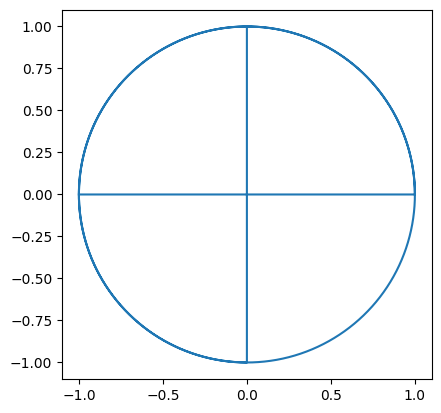

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def show(c):
  plt.plot(c[0, :], c[1, :])
  plt.axis('image');
# plot the unit circle and axis segments:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),
              np.concatenate([z, np.sin(t), l])])
show(c)

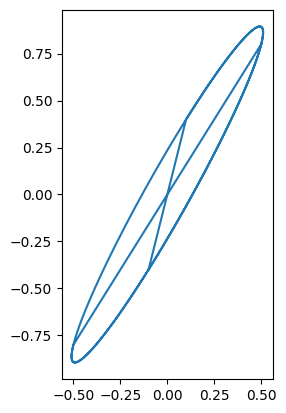

In [ ]:
show(a @ c)

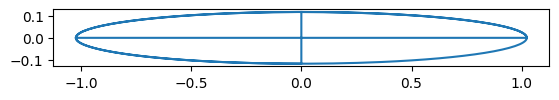

In [ ]:
show(np.diag(s) @ c)

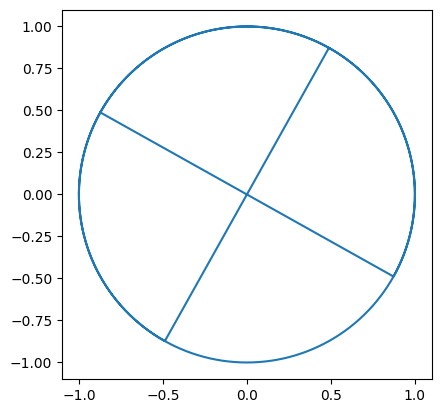

In [ ]:
show(u @ c)

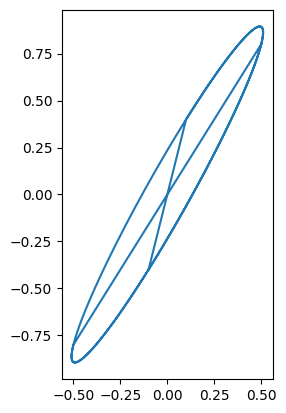

In [ ]:
show(u @ np.diag(s) @ vh @ c)

#4 Low rank approximation

In [ ]:
import matplotlib.pyplot as plt
cats = plt.imread('/content/cat-9140.png')
cats.shape

(348, 525, 4)

In [ ]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

68.662384

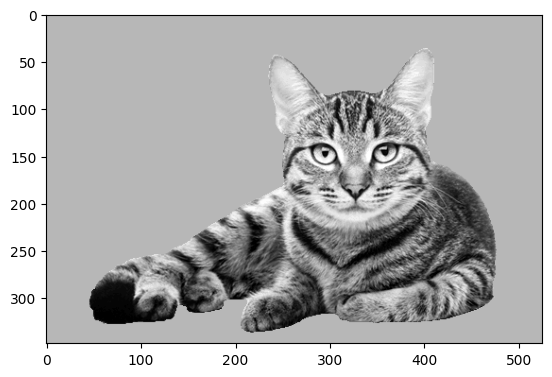

In [ ]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

In [ ]:
u, s, vh = svd(c)

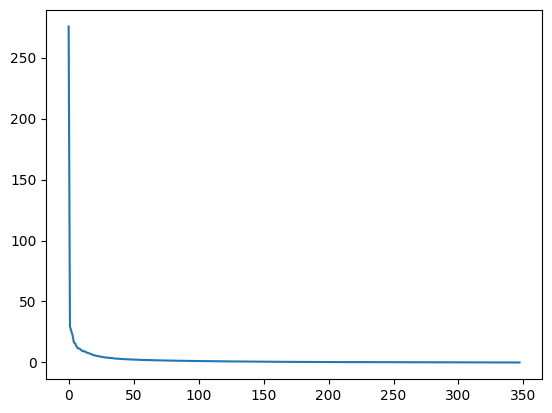

In [ ]:
plt.plot(s);

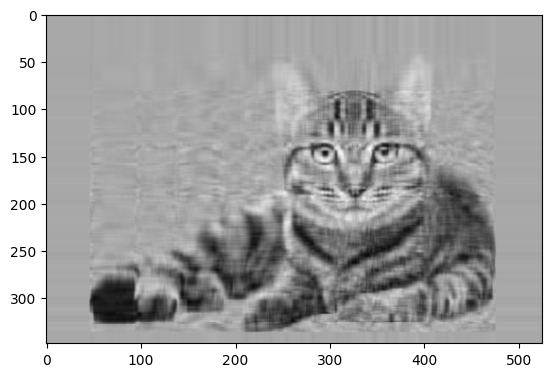

In [ ]:
# Rank 20 approximation of the cats:
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

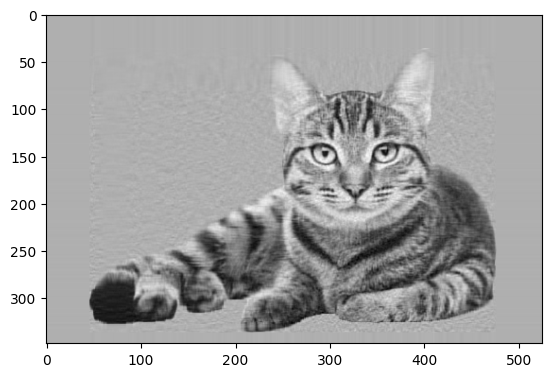

In [ ]:
# Rank 50 approximation of the cats:
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [ ]:
relative_error = 1.e-1

In [ ]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

17

In [ ]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [ ]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09707479

In [ ]:
u.shape[0] * l + l + l * vh.shape[0]

14858

In [ ]:
c.shape[0] * c.shape[1]

182700